In [21]:

import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import graphviz

import pandas as pd
import numpy as np


Question 1: Load the datasets and deal with missing values if applicable in a proper way and describe how you did it. One way you can do it is to replace the value with the mean value of the feature in the training set.

In [22]:
# load datasets
phishing_df = pd.read_csv(r'../data/website-phishing.csv')
bcp_df = pd.read_csv(r'../data/BCP.csv')
arrhythmia_df = pd.read_csv(r'../data/arrhythmia.csv')

In [23]:
# clean data, missing values in particular

# convert "?" to NaN for readibility
phishing_df.replace('?', np.nan, inplace=True)
bcp_df.replace('?', np.nan, inplace=True)
arrhythmia_df.replace('?', np.nan, inplace=True)

# int for categorical 
# float for continuous

phishing_df = phishing_df.astype(int)
# unsure which features are numeric/categorical so make them all categorical
bcp_df = bcp_df.astype(int)
arrhythmia_df = arrhythmia_df.astype(float)
# only sex and class are categorical
arrhythmia_df[" sex"] = arrhythmia_df[" sex"].astype(int)
arrhythmia_df["class"] = arrhythmia_df["class"].astype(int)

# convert NaN values in each column to the mean of data in that column if it's continuous
# and the mode if it's categorical
# remove columns where 50%+ of the entries are missing values

dfs = [phishing_df, bcp_df, arrhythmia_df]

for df in dfs:
    for col in df.columns:
        if df[col].isna().sum() / len(df) > 0.5:
            df.drop(col, axis=1, inplace=True)
        elif df[col].isna().sum() > 0:
            if df[col].dtype == int:
                # 
                df[col].fillna(df[col].mode(), inplace=True)
            else:
                df[col].fillna(df[col].mean(), inplace=True)

# rename class column for consistency when using for loops
phishing_df.rename(columns={phishing_df.columns[-1]: 'class'}, inplace=True)
bcp_df.rename(columns={bcp_df.columns[-1]: 'class'}, inplace=True)
arrhythmia_df.rename(columns={arrhythmia_df.columns[-1]: 'class'}, inplace=True)

Firstly, replace all question marks with NaN values for readability. There are many missing values, especially in the arrhythmia dataset. Two methods can be used to replace missing values. The choice between using the mode or mean for imputing missing values depends on the type of variable and the distribution of values. The mode is appropriate for categorical variables, while the mean is appropriate for normally distributed continuous variables. In this example, I looked through each column in the three dataframes independantly, and then decided which columns were most likely categorical or continuous. I would set the data type as int for categorical, and float for continuous. 

I loop through each column in each dataframe, and filled in missing values denoted by NaN with the mean or mode value of the column depending on if the column data is numeric or categorical. Columns with more than 50% of data as missing values are dropped as there isn't enough data to infer an accurate mean or mode.

Question 2: Implement (1) a decision stump, (2) an unpruned decision tree, (3) a pruned decision tree. Apply (1)-(3) on each dataset. You can use scikit-learn packages. You can use pre-pruning and / or post-pruning techniques as your pruning strategy to obtain the pruned decision tree. Explain the pruning techniques you used.

[Text(0.5, 0.75, 'X[7] <= 0.5\nentropy = 0.99\nsamples = 7738\nvalue = [3408, 4330]'), Text(0.25, 0.25, 'entropy = 0.493\nsamples = 3283\nvalue = [2929, 354]'), Text(0.75, 0.25, 'entropy = 0.492\nsamples = 4455\nvalue = [479, 3976]')]
[Text(0.5, 0.75, 'X[2] <= 2.5\nentropy = 0.934\nsamples = 478\nvalue = [311, 167]'), Text(0.25, 0.25, 'entropy = 0.181\nsamples = 293\nvalue = [285, 8]'), Text(0.75, 0.25, 'entropy = 0.586\nsamples = 185\nvalue = [26, 159]')]
[Text(0.5, 0.75, 'X[275] <= 0.45\nentropy = 2.379\nsamples = 316\nvalue = [172, 33, 7, 14, 7, 18, 2, 2, 5, 34, 2, 5, 15]'), Text(0.25, 0.25, 'entropy = 2.526\nsamples = 76\nvalue = [20, 27, 2, 11, 1, 0, 1, 0, 5, 0, 1, 3, 5]'), Text(0.75, 0.25, 'entropy = 1.931\nsamples = 240\nvalue = [152, 6, 5, 3, 6, 18, 1, 2, 0, 34, 1, 2, 10]')]
Accuracy: [0.8809164908049443, 0.9219512195121952, 0.5735294117647058]


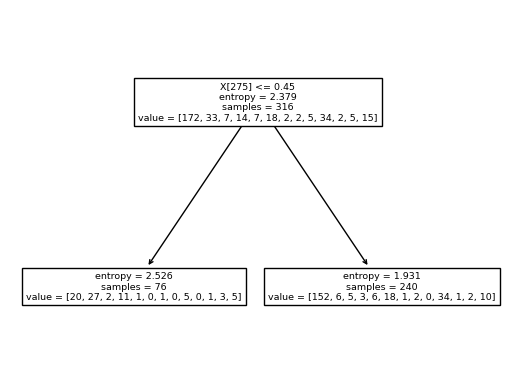

In [24]:
# decision stump
# store accuracies for each dataset
stump_accuracies = []

for df in dfs:
    X = df.drop(["class"], axis=1)
    y = df["class"]

    # split dataset into training and testing sets
    # hyperparameters: training and testing split percentage
    # random state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # create a decision stump model
    model = DecisionTreeClassifier(max_depth=1, criterion="entropy")

    # fit the model to the training data
    model.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = model.predict(X_test)

    # calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    stump_accuracies.append(accuracy)
    
    '''
    # find a way to print this out as multiple graphs
    graph = graphviz.Source(tree.export_graphviz(model, out_file=None))
    graph.render("model")
    print(tree.plot_tree(model))
    '''
    
print("Accuracy:", stump_accuracies)


In [41]:
# unpruned decision tree
# don't specify max depth
# the tree stops growing as the impurity of the split (measured by entropy)
# does not decrease by a certain threshold

# store accuracies for each dataset
unpruned_tree_accuracies = []

for df in dfs:
    X = df.drop(["class"], axis=1)
    y = df["class"]

    # split dataset into training and testing sets
    # hyperparameters: training and testing split percentage
    # random state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # create a decision tree model with no stopping conditions
    model = DecisionTreeClassifier(criterion="entropy")

    # fit the model to the training data
    model.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = model.predict(X_test)

    # calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    unpruned_tree_accuracies.append(accuracy)
    
    '''
    # find a way to print this out as multiple graphs
    graph = graphviz.Source(tree.export_graphviz(model, out_file=None))
    graph.render("model")
    print(tree.plot_tree(model))
    '''
    
print("Accuracy:", unpruned_tree_accuracies)

Accuracy: [0.9559843231835996, 0.9463414634146341, 0.6102941176470589]


In [42]:
# pruned decision tree
# manually tweak the max depth (stopping condition), where setting the max depth is a pre-pruning technique
# find the max depth which allows for the "best" accuracy for all datasets

# store accuracies for each dataset
pruned_tree_accuracies = []

for df in dfs:
    X = df.drop(["class"], axis=1)
    y = df["class"]

    # split dataset into training and testing sets
    # hyperparameters: training and testing split percentage
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # create a decision stump model
    model = DecisionTreeClassifier(max_depth = 7)

    # fit the model to the training data
    model.fit(X_train, y_train)
    
    # do pruning here???

    # make predictions on the testing data
    y_pred = model.predict(X_test)

    # calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    pruned_tree_accuracies.append(accuracy)

    '''
    # find a way to print this out as multiple graphs
    graph = graphviz.Source(tree.export_graphviz(model, out_file=None))
    graph.render("model")
    print(tree.plot_tree(model))
    '''
    
print("Accuracy:", pruned_tree_accuracies)

Accuracy: [0.9345794392523364, 0.9512195121951219, 0.6838235294117647]
